In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import time
import seaborn as sns
import plotly.express as px

<h3>Preprocessing (Loading, removing and showing graphs)</h3>

In [2]:
# Load your CSV dataset (replace 'your_dataset.csv' with your actual dataset)
data = pd.read_csv('family.csv')
#data = data.drop(['Category'], axis=1)
#data = data.drop(['Family'], axis=1)
data = data.drop(['md5'], axis=1)
data = data.drop(['sha1'], axis=1)
data = data.drop(['PEType'], axis=1)
data = data.drop(['file_extension'], axis=1)
data = data.drop(['MachineType'], axis=1)
data = data.drop(['magic_number'], axis=1)
data = data.drop(['Magic'], axis=1)
data = data.drop(['network_threats'], axis=1)
data = data.drop(['text_Characteristics'], axis=1)
data = data.drop(['rdata_Characteristics'], axis=1)
data = data.drop(['OperatingSystemVersion'], axis=1)
data = data.drop(['ImageVersion'], axis=1)
data = data.drop(['Subsystem'], axis=1)
data = data.drop(['DllCharacteristics'], axis=1)
data = data.drop(['AddressOfEntryPoint'], axis=1)
data = data.drop(['oem_identifier'], axis=1)
data = data.drop(['rdata_PointerToRelocations'], axis=1)
data = data.drop(['init_ss_value'], axis=1)
data = data.drop(['LoaderFlags'], axis=1)
data = data.drop(['init_ip_value'], axis=1)
data = data.drop(['init_cs_value'], axis=1)
data = data.drop(['text_PointerToLineNumbers'], axis=1)
data = data.drop(['rdata_PointerToLineNumbers'], axis=1)
data = data.drop(['text_PointerToRelocations'], axis=1)

In [3]:
# Load the dataset
df = data
# Convert hexadecimal values to numeric
df['EntryPoint'] = df['EntryPoint'].apply(lambda x: int(x, 16))
df['bytes_on_last_page'] = df['bytes_on_last_page'].apply(lambda x: int(x, 16))
df['pages_in_file'] = df['pages_in_file'].apply(lambda x: int(x, 16))
df['relocations'] = df['relocations'].apply(lambda x: int(x, 16))
df['size_of_header'] = df['size_of_header'].apply(lambda x: int(x, 16))
df['min_extra_paragraphs'] = df['min_extra_paragraphs'].apply(lambda x: int(x, 16))
df['max_extra_paragraphs'] = df['max_extra_paragraphs'].apply(lambda x: int(x, 16))
#df['init_ss_value'] = df['init_ss_value'].apply(lambda x: int(x, 16))
df['init_sp_value'] = df['init_sp_value'].apply(lambda x: int(x, 16))
#df['init_ip_value'] = df['init_ip_value'].apply(lambda x: int(x, 16))
#df['init_cs_value'] = df['init_cs_value'].apply(lambda x: int(x, 16))
df['over_lay_number'] = df['over_lay_number'].apply(lambda x: int(x, 16))
#df['oem_identifier'] = df['oem_identifier'].apply(lambda x: int(x, 16))
df['address_of_ne_header'] = df['address_of_ne_header'].apply(lambda x: int(x, 16))
df['SizeOfCode'] = df['SizeOfCode'].apply(lambda x: int(x, 16))
df['SizeOfInitializedData'] = df['SizeOfInitializedData'].apply(lambda x: int(x, 16))
df['SizeOfUninitializedData'] = df['SizeOfUninitializedData'].apply(lambda x: int(x, 16))
#df['AddressOfEntryPoint'] = df['AddressOfEntryPoint'].apply(lambda x: int(x, 16))
df['BaseOfCode'] = df['BaseOfCode'].apply(lambda x: int(x, 16))
df['BaseOfData'] = df['BaseOfData'].apply(lambda x: int(x, 16))
df['ImageBase'] = df['ImageBase'].apply(lambda x: int(x, 16))
df['SectionAlignment'] = df['SectionAlignment'].apply(lambda x: int(x, 16))
df['FileAlignment'] = df['FileAlignment'].apply(lambda x: int(x, 16))
df['SizeOfImage'] = df['SizeOfImage'].apply(lambda x: int(x, 16))
df['SizeOfHeaders'] = df['SizeOfHeaders'].apply(lambda x: int(x, 16))
df['Checksum'] = df['Checksum'].apply(lambda x: int(x, 16))
df['SizeofStackReserve'] = df['SizeofStackReserve'].apply(lambda x: int(x, 16))
df['SizeofStackCommit'] = df['SizeofStackCommit'].apply(lambda x: int(x, 16))
df['SizeofHeapCommit'] = df['SizeofHeapCommit'].apply(lambda x: int(x, 16))
df['SizeofHeapReserve'] = df['SizeofHeapReserve'].apply(lambda x: int(x, 16))
#df['LoaderFlags'] = df['LoaderFlags'].apply(lambda x: int(x, 16))
df['text_VirtualSize'] = df['text_VirtualSize'].apply(lambda x: int(x, 16))
df['text_VirtualAddress'] = df['text_VirtualAddress'].apply(lambda x: int(x, 16))
df['text_SizeOfRawData'] = df['text_SizeOfRawData'].apply(lambda x: int(x, 16))
df['text_PointerToRawData'] = df['text_PointerToRawData'].apply(lambda x: int(x, 16))
#df['text_PointerToRelocations'] = df['text_PointerToRelocations'].apply(lambda x: int(x, 16))
#df['text_PointerToLineNumbers'] = df['text_PointerToLineNumbers'].apply(lambda x: int(x, 16))
df['rdata_VirtualSize'] = df['rdata_VirtualSize'].apply(lambda x: int(x, 16))
df['rdata_VirtualAddress'] = df['rdata_VirtualAddress'].apply(lambda x: int(x, 16))
df['rdata_SizeOfRawData'] = df['rdata_SizeOfRawData'].apply(lambda x: int(x, 16))
df['rdata_PointerToRawData'] = df['rdata_PointerToRawData'].apply(lambda x: int(x, 16))
#df['rdata_PointerToRelocations'] = df['rdata_PointerToRelocations'].apply(lambda x: int(x, 16))
#df['rdata_PointerToLineNumbers'] = df['rdata_PointerToLineNumbers'].apply(lambda x: int(x, 16))

In [4]:
# Assuming you have a DataFrame named 'df'
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
categorical_columns =[ 'Class', 'Category', 'Family']
df = pd.DataFrame(df)

In [5]:
from sklearn.preprocessing import LabelEncoder
# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

<h3>Normalization</h3>

In [6]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Create a Min-Max scaler instance
scaler = StandardScaler()
# Select the columns you want to scale (exclude the target variable if needed)
columns_to_scale = df.columns  # You can select specific columns here

# Fit the scaler on the selected columns and transform the data
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

<h3>Spliting for Training and Testing</h3>

In [7]:
# Separate features and labels
X = df.iloc[:, :-1].values  # Features
y = df.iloc[:, -1].values   # Class labels
X.shape

(4847, 52)

In [8]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Encode the target labels
smote = SMOTE(random_state=42)

X_smote, y_smote = smote.fit_resample(X, y_encoded)
X_smote.shape

(6050, 52)

<h3>MLP with 20 Epochs Implementation</h3>

Fold 5/5: 100%|██████████| 20/20 [00:08<00:00,  2.47it/s]


Mean Accuracy: 89.60%
Mean Training Time (seconds): 44.57
Mean Testing Time (seconds): 0.00
Mean Training Loss: 0.5162
Mean Test Loss: 0.5448


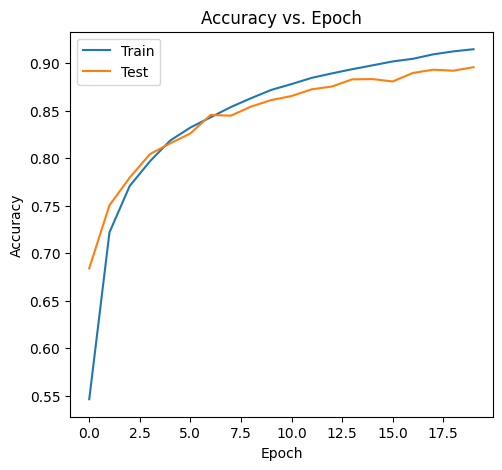

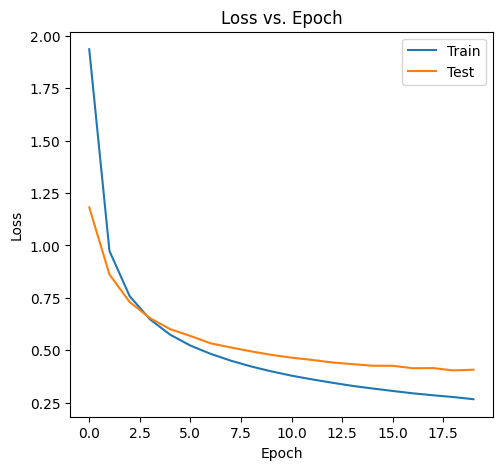

In [21]:
# Convert data to PyTorch tensors
X = torch.tensor(X_smote, dtype=torch.float32)
y = torch.tensor(y_smote, dtype=torch.long)

# Define the number of folds for cross-validation
num_splits = 5  # You can adjust the number of folds as needed

# Initialize lists to store accuracy scores, training and testing loss, and times
fold_accuracies = []
train_losses = []
test_losses = []
train_times = []
test_times = []

all_train_accuracies = []
all_test_accuracies = []
all_train_losses = []
all_test_losses = []

all_true_labels = []
all_predicted_labels = []

# Initialize the cross-validator
kf = StratifiedKFold(n_splits=num_splits, shuffle=True, random_state=42)

# Define your MLP model
class MLPModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Specify the model hyperparameters
input_size = X.shape[1]  # Number of input features
hidden_size = 128  # Number of hidden units
num_classes = len(np.unique(y))  # Number of classes

# Loop over the folds
for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create DataLoader for training and testing
    train_dataset = TensorDataset(X_train, y_train)
    test_dataset = TensorDataset(X_test, y_test)

    batch_size = 32
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Create an instance of the MLP model
    model = MLPModel(input_size, hidden_size, num_classes)

    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training loop
    num_epochs = 20
    train_losses_fold = []
    test_losses_fold = []
    train_accuracies = []
    test_accuracies = []

    start_time = time.time()

    for epoch in tqdm(range(num_epochs), desc=f'Fold {fold + 1}/{num_splits}'):
        model.train()
        correct_train = 0
        total_train = 0
        running_train_loss = 0.0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

            # Append true labels and predicted labels for this batch
            all_true_labels.extend(labels.tolist())
            all_predicted_labels.extend(predicted.tolist())

        train_accuracy = correct_train / total_train
        train_losses_fold.append(running_train_loss / len(train_loader))
        train_accuracies.append(train_accuracy)

        # Evaluation on the test set
        model.eval()
        correct_test = 0
        total_test = 0
        running_test_loss = 0.0

        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

        test_accuracy = correct_test / total_test
        test_losses_fold.append(running_test_loss / len(test_loader))
        test_accuracies.append(test_accuracy)

    # Store the accuracy of this fold
    fold_accuracies.append(test_accuracies[-1])
    train_losses.append(train_losses_fold)
    test_losses.append(test_losses_fold)

    end_time = time.time()
    train_time = end_time - start_time
    train_times.append(train_time)

    # Calculate the testing time for the fold
    start_time = time.time()
    for _ in range(len(test_loader)):
        pass
    end_time = time.time()
    test_time = end_time - start_time
    test_times.append(test_time)

    # Append accuracy and loss for this fold
    all_train_accuracies.append(train_accuracies)
    all_test_accuracies.append(test_accuracies)
    all_train_losses.append(train_losses_fold)
    all_test_losses.append(test_losses_fold)

# Calculate and print the mean accuracy across all folds
mean_accuracy = np.mean(fold_accuracies)
print(f'Mean Accuracy: {mean_accuracy * 100:.2f}%')

# Calculate and print the total test loss across all folds
total_test_loss = sum([sum(loss) for loss in all_test_losses])

# Calculate and print the total average test loss (across all epochs and folds)
total_average_test_loss = total_test_loss / (num_splits * num_epochs)

# Calculate and print the mean training and testing times across all folds
mean_train_time = np.sum(train_times)
mean_test_time = np.sum(test_times)
print(f'Mean Training Time (seconds): {mean_train_time:.2f}')
print(f'Mean Testing Time (seconds): {mean_test_time:.2f}')

# Calculate and print the mean training loss across all epochs and folds
mean_training_loss = np.mean([np.mean(loss) for loss in all_train_losses])
print(f'Mean Training Loss: {mean_training_loss:.4f}')

# Calculate and print the mean test loss across all epochs and folds
mean_test_loss = np.mean([np.mean(loss) for loss in all_test_losses])
print(f'Mean Test Loss: {mean_test_loss:.4f}')

# Plot training and test accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
mean_train_accuracies = np.mean(all_train_accuracies, axis=0)
mean_test_accuracies = np.mean(all_test_accuracies, axis=0)
plt.plot(range(num_epochs), mean_train_accuracies, label="Train")
plt.plot(range(num_epochs), mean_test_accuracies, label="Test")
plt.title("Accuracy vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig('/content/drive/MyDrive/ML/Thesis/my_dataset/Family_Attribution/graphs/mlp/20_epochs_accuracy.pdf', format='pdf')
plt.show()
plt.close()
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
mean_train_losses = np.mean(all_train_losses, axis=0)
mean_test_losses = np.mean(all_test_losses, axis=0)
plt.plot(range(num_epochs), mean_train_losses, label="Train")
plt.plot(range(num_epochs), mean_test_losses, label="Test")
plt.title("Loss vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.savefig('/content/drive/MyDrive/ML/Thesis/my_dataset/Family_Attribution/graphs/mlp/20_epochs_loss.pdf', format='pdf')
plt.show()
plt.close()

<h3>MLP with 30 Epochs Implementation</h3>

Fold 5/5: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Mean Accuracy: 91.37%
Mean Training Time (seconds): 58.73
Mean Testing Time (seconds): 0.00
Mean Training Loss: 0.4179
Mean Test Loss: 0.4887


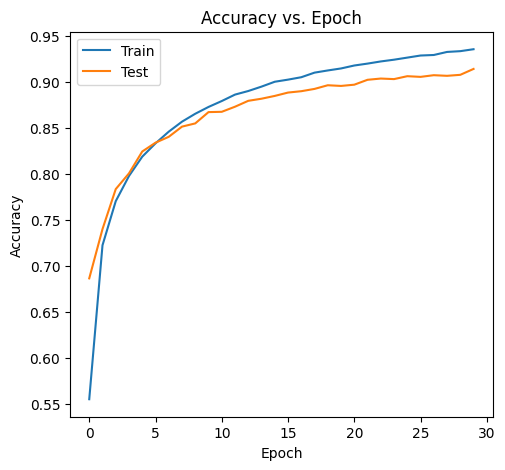

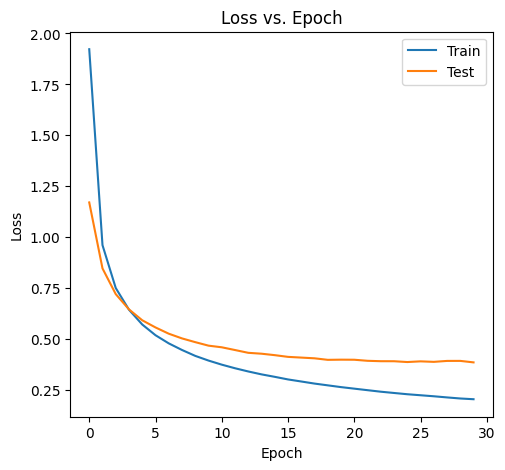

In [22]:
# Convert data to PyTorch tensors
X = torch.tensor(X_smote, dtype=torch.float32)
y = torch.tensor(y_smote, dtype=torch.long)

# Define the number of folds for cross-validation
num_splits = 5  # You can adjust the number of folds as needed

# Initialize lists to store accuracy scores, training and testing loss, and times
fold_accuracies = []
train_losses = []
test_losses = []
train_times = []
test_times = []

all_train_accuracies = []
all_test_accuracies = []
all_train_losses = []
all_test_losses = []

all_true_labels = []
all_predicted_labels = []

# Initialize the cross-validator
kf = StratifiedKFold(n_splits=num_splits, shuffle=True, random_state=42)

# Define your MLP model
class MLPModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Specify the model hyperparameters
input_size = X.shape[1]  # Number of input features
hidden_size = 128  # Number of hidden units
num_classes = len(np.unique(y))  # Number of classes

# Loop over the folds
for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create DataLoader for training and testing
    train_dataset = TensorDataset(X_train, y_train)
    test_dataset = TensorDataset(X_test, y_test)

    batch_size = 32
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Create an instance of the MLP model
    model = MLPModel(input_size, hidden_size, num_classes)

    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training loop
    num_epochs = 30
    train_losses_fold = []
    test_losses_fold = []
    train_accuracies = []
    test_accuracies = []

    start_time = time.time()

    for epoch in tqdm(range(num_epochs), desc=f'Fold {fold + 1}/{num_splits}'):
        model.train()
        correct_train = 0
        total_train = 0
        running_train_loss = 0.0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

            # Append true labels and predicted labels for this batch
            all_true_labels.extend(labels.tolist())
            all_predicted_labels.extend(predicted.tolist())

        train_accuracy = correct_train / total_train
        train_losses_fold.append(running_train_loss / len(train_loader))
        train_accuracies.append(train_accuracy)

        # Evaluation on the test set
        model.eval()
        correct_test = 0
        total_test = 0
        running_test_loss = 0.0

        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

        test_accuracy = correct_test / total_test
        test_losses_fold.append(running_test_loss / len(test_loader))
        test_accuracies.append(test_accuracy)

    # Store the accuracy of this fold
    fold_accuracies.append(test_accuracies[-1])
    train_losses.append(train_losses_fold)
    test_losses.append(test_losses_fold)

    end_time = time.time()
    train_time = end_time - start_time
    train_times.append(train_time)

    # Calculate the testing time for the fold
    start_time = time.time()
    for _ in range(len(test_loader)):
        pass
    end_time = time.time()
    test_time = end_time - start_time
    test_times.append(test_time)

    # Append accuracy and loss for this fold
    all_train_accuracies.append(train_accuracies)
    all_test_accuracies.append(test_accuracies)
    all_train_losses.append(train_losses_fold)
    all_test_losses.append(test_losses_fold)

# Calculate and print the mean accuracy across all folds
mean_accuracy = np.mean(fold_accuracies)
print(f'Mean Accuracy: {mean_accuracy * 100:.2f}%')

# Calculate and print the total test loss across all folds
total_test_loss = sum([sum(loss) for loss in all_test_losses])

# Calculate and print the total average test loss (across all epochs and folds)
total_average_test_loss = total_test_loss / (num_splits * num_epochs)

# Calculate and print the mean training and testing times across all folds
mean_train_time = np.sum(train_times)
mean_test_time = np.sum(test_times)
print(f'Mean Training Time (seconds): {mean_train_time:.2f}')
print(f'Mean Testing Time (seconds): {mean_test_time:.2f}')

# Calculate and print the mean training loss across all epochs and folds
mean_training_loss = np.mean([np.mean(loss) for loss in all_train_losses])
print(f'Mean Training Loss: {mean_training_loss:.4f}')

# Calculate and print the mean test loss across all epochs and folds
mean_test_loss = np.mean([np.mean(loss) for loss in all_test_losses])
print(f'Mean Test Loss: {mean_test_loss:.4f}')

# Plot training and test accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
mean_train_accuracies = np.mean(all_train_accuracies, axis=0)
mean_test_accuracies = np.mean(all_test_accuracies, axis=0)
plt.plot(range(num_epochs), mean_train_accuracies, label="Train")
plt.plot(range(num_epochs), mean_test_accuracies, label="Test")
plt.title("Accuracy vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig('/content/drive/MyDrive/ML/Thesis/my_dataset/Family_Attribution/graphs/mlp/30_epochs_accuracy.pdf', format='pdf')
plt.show()
plt.close()
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
mean_train_losses = np.mean(all_train_losses, axis=0)
mean_test_losses = np.mean(all_test_losses, axis=0)
plt.plot(range(num_epochs), mean_train_losses, label="Train")
plt.plot(range(num_epochs), mean_test_losses, label="Test")
plt.title("Loss vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.savefig('/content/drive/MyDrive/ML/Thesis/my_dataset/Family_Attribution/graphs/mlp/30_epochs_loss.pdf', format='pdf')
plt.show()
plt.close()

<h3>MLP with 50 Epochs Implementation</h3>

Fold 5/5: 100%|██████████| 50/50 [00:19<00:00,  2.60it/s]


Mean Accuracy: 92.30%
Mean Training Time (seconds): 98.54
Mean Testing Time (seconds): 0.00
Mean Training Loss: 0.3196
Mean Test Loss: 0.4499


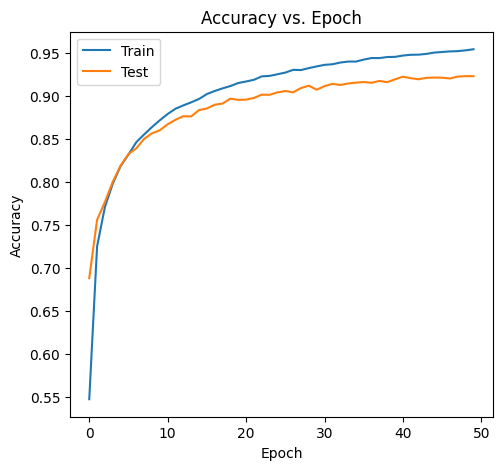

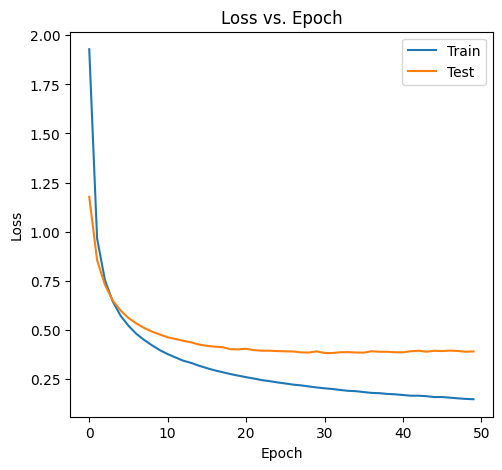

In [23]:
# Convert data to PyTorch tensors
X = torch.tensor(X_smote, dtype=torch.float32)
y = torch.tensor(y_smote, dtype=torch.long)

# Define the number of folds for cross-validation
num_splits = 5  # You can adjust the number of folds as needed

# Initialize lists to store accuracy scores, training and testing loss, and times
fold_accuracies = []
train_losses = []
test_losses = []
train_times = []
test_times = []

all_train_accuracies = []
all_test_accuracies = []
all_train_losses = []
all_test_losses = []

all_true_labels = []
all_predicted_labels = []

# Initialize the cross-validator
kf = StratifiedKFold(n_splits=num_splits, shuffle=True, random_state=42)

# Define your MLP model
class MLPModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Specify the model hyperparameters
input_size = X.shape[1]  # Number of input features
hidden_size = 128  # Number of hidden units
num_classes = len(np.unique(y))  # Number of classes

# Loop over the folds
for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create DataLoader for training and testing
    train_dataset = TensorDataset(X_train, y_train)
    test_dataset = TensorDataset(X_test, y_test)

    batch_size = 32
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Create an instance of the MLP model
    model = MLPModel(input_size, hidden_size, num_classes)

    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training loop
    num_epochs = 50
    train_losses_fold = []
    test_losses_fold = []
    train_accuracies = []
    test_accuracies = []

    start_time = time.time()

    for epoch in tqdm(range(num_epochs), desc=f'Fold {fold + 1}/{num_splits}'):
        model.train()
        correct_train = 0
        total_train = 0
        running_train_loss = 0.0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

            # Append true labels and predicted labels for this batch
            all_true_labels.extend(labels.tolist())
            all_predicted_labels.extend(predicted.tolist())

        train_accuracy = correct_train / total_train
        train_losses_fold.append(running_train_loss / len(train_loader))
        train_accuracies.append(train_accuracy)

        # Evaluation on the test set
        model.eval()
        correct_test = 0
        total_test = 0
        running_test_loss = 0.0

        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

        test_accuracy = correct_test / total_test
        test_losses_fold.append(running_test_loss / len(test_loader))
        test_accuracies.append(test_accuracy)

    # Store the accuracy of this fold
    fold_accuracies.append(test_accuracies[-1])
    train_losses.append(train_losses_fold)
    test_losses.append(test_losses_fold)

    end_time = time.time()
    train_time = end_time - start_time
    train_times.append(train_time)

    # Calculate the testing time for the fold
    start_time = time.time()
    for _ in range(len(test_loader)):
        pass
    end_time = time.time()
    test_time = end_time - start_time
    test_times.append(test_time)

    # Append accuracy and loss for this fold
    all_train_accuracies.append(train_accuracies)
    all_test_accuracies.append(test_accuracies)
    all_train_losses.append(train_losses_fold)
    all_test_losses.append(test_losses_fold)

# Calculate and print the mean accuracy across all folds
mean_accuracy = np.mean(fold_accuracies)
print(f'Mean Accuracy: {mean_accuracy * 100:.2f}%')

# Calculate and print the total test loss across all folds
total_test_loss = sum([sum(loss) for loss in all_test_losses])

# Calculate and print the total average test loss (across all epochs and folds)
total_average_test_loss = total_test_loss / (num_splits * num_epochs)

# Calculate and print the mean training and testing times across all folds
mean_train_time = np.sum(train_times)
mean_test_time = np.sum(test_times)
print(f'Mean Training Time (seconds): {mean_train_time:.2f}')
print(f'Mean Testing Time (seconds): {mean_test_time:.2f}')

# Calculate and print the mean training loss across all epochs and folds
mean_training_loss = np.mean([np.mean(loss) for loss in all_train_losses])
print(f'Mean Training Loss: {mean_training_loss:.4f}')

# Calculate and print the mean test loss across all epochs and folds
mean_test_loss = np.mean([np.mean(loss) for loss in all_test_losses])
print(f'Mean Test Loss: {mean_test_loss:.4f}')

# Plot training and test accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
mean_train_accuracies = np.mean(all_train_accuracies, axis=0)
mean_test_accuracies = np.mean(all_test_accuracies, axis=0)
plt.plot(range(num_epochs), mean_train_accuracies, label="Train")
plt.plot(range(num_epochs), mean_test_accuracies, label="Test")
plt.title("Accuracy vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig('/content/drive/MyDrive/ML/Thesis/my_dataset/Family_Attribution/graphs/mlp/50_epochs_accuracy.pdf', format='pdf')
plt.show()
plt.close()
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
mean_train_losses = np.mean(all_train_losses, axis=0)
mean_test_losses = np.mean(all_test_losses, axis=0)
plt.plot(range(num_epochs), mean_train_losses, label="Train")
plt.plot(range(num_epochs), mean_test_losses, label="Test")
plt.title("Loss vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.savefig('/content/drive/MyDrive/ML/Thesis/my_dataset/Family_Attribution/graphs/mlp/50_epochs_loss.pdf', format='pdf')
plt.show()
plt.close()

<h3>MLP with 100 Epochs Implementation</h3>

Fold 5/5: 100%|██████████| 100/100 [00:39<00:00,  2.54it/s]


Mean Accuracy: 93.39%
Mean Training Time (seconds): 195.83
Mean Testing Time (seconds): 0.00
Mean Training Loss: 0.2147
Mean Test Loss: 0.4660


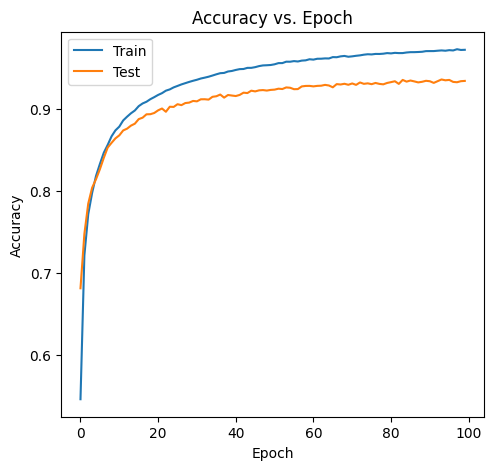

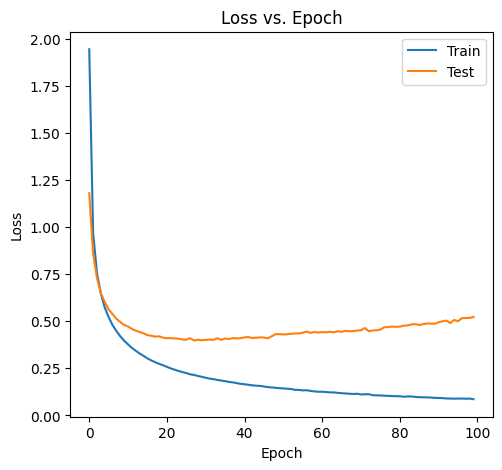

In [24]:
# Convert data to PyTorch tensors
X = torch.tensor(X_smote, dtype=torch.float32)
y = torch.tensor(y_smote, dtype=torch.long)

# Define the number of folds for cross-validation
num_splits = 5  # You can adjust the number of folds as needed

# Initialize lists to store accuracy scores, training and testing loss, and times
fold_accuracies = []
train_losses = []
test_losses = []
train_times = []
test_times = []

all_train_accuracies = []
all_test_accuracies = []
all_train_losses = []
all_test_losses = []

all_true_labels = []
all_predicted_labels = []

# Initialize the cross-validator
kf = StratifiedKFold(n_splits=num_splits, shuffle=True, random_state=42)

# Define your MLP model
class MLPModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Specify the model hyperparameters
input_size = X.shape[1]  # Number of input features
hidden_size = 128  # Number of hidden units
num_classes = len(np.unique(y))  # Number of classes

# Loop over the folds
for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create DataLoader for training and testing
    train_dataset = TensorDataset(X_train, y_train)
    test_dataset = TensorDataset(X_test, y_test)

    batch_size = 32
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Create an instance of the MLP model
    model = MLPModel(input_size, hidden_size, num_classes)

    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training loop
    num_epochs = 100
    train_losses_fold = []
    test_losses_fold = []
    train_accuracies = []
    test_accuracies = []

    start_time = time.time()

    for epoch in tqdm(range(num_epochs), desc=f'Fold {fold + 1}/{num_splits}'):
        model.train()
        correct_train = 0
        total_train = 0
        running_train_loss = 0.0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

            # Append true labels and predicted labels for this batch
            all_true_labels.extend(labels.tolist())
            all_predicted_labels.extend(predicted.tolist())

        train_accuracy = correct_train / total_train
        train_losses_fold.append(running_train_loss / len(train_loader))
        train_accuracies.append(train_accuracy)

        # Evaluation on the test set
        model.eval()
        correct_test = 0
        total_test = 0
        running_test_loss = 0.0

        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

        test_accuracy = correct_test / total_test
        test_losses_fold.append(running_test_loss / len(test_loader))
        test_accuracies.append(test_accuracy)

    # Store the accuracy of this fold
    fold_accuracies.append(test_accuracies[-1])
    train_losses.append(train_losses_fold)
    test_losses.append(test_losses_fold)

    end_time = time.time()
    train_time = end_time - start_time
    train_times.append(train_time)

    # Calculate the testing time for the fold
    start_time = time.time()
    for _ in range(len(test_loader)):
        pass
    end_time = time.time()
    test_time = end_time - start_time
    test_times.append(test_time)

    # Append accuracy and loss for this fold
    all_train_accuracies.append(train_accuracies)
    all_test_accuracies.append(test_accuracies)
    all_train_losses.append(train_losses_fold)
    all_test_losses.append(test_losses_fold)

# Calculate and print the mean accuracy across all folds
mean_accuracy = np.mean(fold_accuracies)
print(f'Mean Accuracy: {mean_accuracy * 100:.2f}%')

# Calculate and print the total test loss across all folds
total_test_loss = sum([sum(loss) for loss in all_test_losses])

# Calculate and print the total average test loss (across all epochs and folds)
total_average_test_loss = total_test_loss / (num_splits * num_epochs)

# Calculate and print the mean training and testing times across all folds
mean_train_time = np.sum(train_times)
mean_test_time = np.sum(test_times)
print(f'Mean Training Time (seconds): {mean_train_time:.2f}')
print(f'Mean Testing Time (seconds): {mean_test_time:.2f}')

# Calculate and print the mean training loss across all epochs and folds
mean_training_loss = np.mean([np.mean(loss) for loss in all_train_losses])
print(f'Mean Training Loss: {mean_training_loss:.4f}')

# Calculate and print the mean test loss across all epochs and folds
mean_test_loss = np.mean([np.mean(loss) for loss in all_test_losses])
print(f'Mean Test Loss: {mean_test_loss:.4f}')

# Plot training and test accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
mean_train_accuracies = np.mean(all_train_accuracies, axis=0)
mean_test_accuracies = np.mean(all_test_accuracies, axis=0)
plt.plot(range(num_epochs), mean_train_accuracies, label="Train")
plt.plot(range(num_epochs), mean_test_accuracies, label="Test")
plt.title("Accuracy vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig('/content/drive/MyDrive/ML/Thesis/my_dataset/Family_Attribution/graphs/mlp/100_epochs_accuracy.pdf', format='pdf')
plt.show()
plt.close()
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
mean_train_losses = np.mean(all_train_losses, axis=0)
mean_test_losses = np.mean(all_test_losses, axis=0)
plt.plot(range(num_epochs), mean_train_losses, label="Train")
plt.plot(range(num_epochs), mean_test_losses, label="Test")
plt.title("Loss vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.savefig('/content/drive/MyDrive/ML/Thesis/my_dataset/Family_Attribution/graphs/mlp/100_epochs_loss.pdf', format='pdf')
plt.show()
plt.close()

<h3>MLP with 150 Epochs Implementation</h3>

Fold 5/5: 100%|██████████| 150/150 [00:59<00:00,  2.53it/s]


Mean Accuracy: 93.82%
Mean Training Time (seconds): 297.95
Mean Testing Time (seconds): 0.00
Mean Training Loss: 0.1664
Mean Test Loss: 0.4726


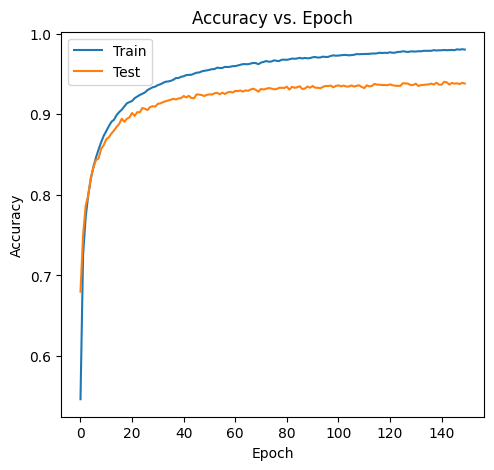

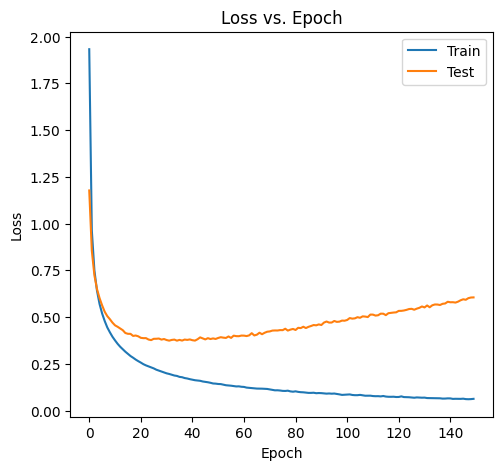

In [25]:
# Convert data to PyTorch tensors
X = torch.tensor(X_smote, dtype=torch.float32)
y = torch.tensor(y_smote, dtype=torch.long)

# Define the number of folds for cross-validation
num_splits = 5  # You can adjust the number of folds as needed

# Initialize lists to store accuracy scores, training and testing loss, and times
fold_accuracies = []
train_losses = []
test_losses = []
train_times = []
test_times = []

all_train_accuracies = []
all_test_accuracies = []
all_train_losses = []
all_test_losses = []

all_true_labels = []
all_predicted_labels = []

# Initialize the cross-validator
kf = StratifiedKFold(n_splits=num_splits, shuffle=True, random_state=42)

# Define your MLP model
class MLPModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Specify the model hyperparameters
input_size = X.shape[1]  # Number of input features
hidden_size = 128  # Number of hidden units
num_classes = len(np.unique(y))  # Number of classes

# Loop over the folds
for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create DataLoader for training and testing
    train_dataset = TensorDataset(X_train, y_train)
    test_dataset = TensorDataset(X_test, y_test)

    batch_size = 32
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Create an instance of the MLP model
    model = MLPModel(input_size, hidden_size, num_classes)

    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training loop
    num_epochs = 150
    train_losses_fold = []
    test_losses_fold = []
    train_accuracies = []
    test_accuracies = []

    start_time = time.time()

    for epoch in tqdm(range(num_epochs), desc=f'Fold {fold + 1}/{num_splits}'):
        model.train()
        correct_train = 0
        total_train = 0
        running_train_loss = 0.0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

            # Append true labels and predicted labels for this batch
            all_true_labels.extend(labels.tolist())
            all_predicted_labels.extend(predicted.tolist())

        train_accuracy = correct_train / total_train
        train_losses_fold.append(running_train_loss / len(train_loader))
        train_accuracies.append(train_accuracy)

        # Evaluation on the test set
        model.eval()
        correct_test = 0
        total_test = 0
        running_test_loss = 0.0

        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

        test_accuracy = correct_test / total_test
        test_losses_fold.append(running_test_loss / len(test_loader))
        test_accuracies.append(test_accuracy)

    # Store the accuracy of this fold
    fold_accuracies.append(test_accuracies[-1])
    train_losses.append(train_losses_fold)
    test_losses.append(test_losses_fold)

    end_time = time.time()
    train_time = end_time - start_time
    train_times.append(train_time)

    # Calculate the testing time for the fold
    start_time = time.time()
    for _ in range(len(test_loader)):
        pass
    end_time = time.time()
    test_time = end_time - start_time
    test_times.append(test_time)

    # Append accuracy and loss for this fold
    all_train_accuracies.append(train_accuracies)
    all_test_accuracies.append(test_accuracies)
    all_train_losses.append(train_losses_fold)
    all_test_losses.append(test_losses_fold)

# Calculate and print the mean accuracy across all folds
mean_accuracy = np.mean(fold_accuracies)
print(f'Mean Accuracy: {mean_accuracy * 100:.2f}%')

# Calculate and print the total test loss across all folds
total_test_loss = sum([sum(loss) for loss in all_test_losses])

# Calculate and print the total average test loss (across all epochs and folds)
total_average_test_loss = total_test_loss / (num_splits * num_epochs)

# Calculate and print the mean training and testing times across all folds
mean_train_time = np.sum(train_times)
mean_test_time = np.sum(test_times)
print(f'Mean Training Time (seconds): {mean_train_time:.2f}')
print(f'Mean Testing Time (seconds): {mean_test_time:.2f}')

# Calculate and print the mean training loss across all epochs and folds
mean_training_loss = np.mean([np.mean(loss) for loss in all_train_losses])
print(f'Mean Training Loss: {mean_training_loss:.4f}')

# Calculate and print the mean test loss across all epochs and folds
mean_test_loss = np.mean([np.mean(loss) for loss in all_test_losses])
print(f'Mean Test Loss: {mean_test_loss:.4f}')

# Plot training and test accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
mean_train_accuracies = np.mean(all_train_accuracies, axis=0)
mean_test_accuracies = np.mean(all_test_accuracies, axis=0)
plt.plot(range(num_epochs), mean_train_accuracies, label="Train")
plt.plot(range(num_epochs), mean_test_accuracies, label="Test")
plt.title("Accuracy vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig('/content/drive/MyDrive/ML/Thesis/my_dataset/Family_Attribution/graphs/mlp/150_epochs_accuracy.pdf', format='pdf')
plt.show()
plt.close()
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
mean_train_losses = np.mean(all_train_losses, axis=0)
mean_test_losses = np.mean(all_test_losses, axis=0)
plt.plot(range(num_epochs), mean_train_losses, label="Train")
plt.plot(range(num_epochs), mean_test_losses, label="Test")
plt.title("Loss vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.savefig('/content/drive/MyDrive/ML/Thesis/my_dataset/Family_Attribution/graphs/mlp/150_epochs_loss.pdf', format='pdf')
plt.show()
plt.close()